In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm, cross_validation
import pylab as pl
from PIL import Image
import numpy as np

folders:  ['bottom_player_winning_selected', 'top_player_winning_selected']
(1080000,)
['data', 'target']


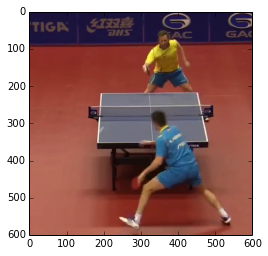

In [5]:
import os

training_set = {}
data = []
target = []
container_path = 'labeled_image_selected'

folders = [f for f in sorted(os.listdir(container_path)) if os.path.isdir(os.path.join(container_path, f))]
print 'folders: ', folders
for folder in folders:
    folder_path = os.path.join(container_path, folder)
    documents = [os.path.join(folder_path, d) for d in sorted(os.listdir(folder_path))]
    for pic in documents:
        if not pic.endswith('png'):
            continue
        pil_im = Image.open(pic, 'r')
        if len(data) == 0:
            print np.asarray(pil_im).ravel().shape
            plt.imshow(np.asarray(pil_im))
        data.append(np.asarray(pil_im).ravel())
        target.append(folder)
training_set['data']=data
training_set['target']=target
print training_set.keys()

# convert to array for fancy indexing
#filenames = np.array(filenames)
#target = np.array(target)

In [6]:
print 'number of images: ', len(training_set['data'])
print 'dimensionality of each image: ', len(training_set['data'][0])
print training_set['target'][2200]

number of images:  4800
dimensionality of each image:  1080000
bottom_player_winning_selected


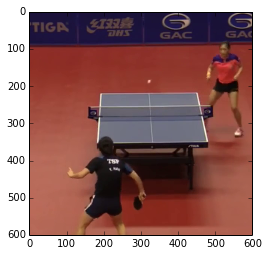

Prediction:  ['top_player_winning_selected']
Actual:  top_player_winning_selected


In [7]:
from sklearn import svm
clf = svm.SVC()
#clf.fit(digits.data[:-1], digits.target[:-1])
clf.fit(training_set['data'][2200:2300], training_set['target'][2200:2300])
plt.imshow(training_set['data'][2301].reshape(600,600,3))
plt.show()
#print digits_new['data'][-1].reshape(24,24)
print 'Prediction: ', clf.predict(training_set['data'][2301])
print 'Actual: ', training_set['target'][2301]

In [8]:
from sklearn import decomposition

X_train, X_test, y_train, y_test = cross_validation.train_test_split(training_set['data'][2100:2400], training_set['target'][2100:2400], test_size=0.3, random_state=42)
print 'X_train & X_test shapes before PCA: ', X_train.shape, X_test.shape
print 'y_train & y_test shapes before PCA: ', y_train.shape, y_test.shape
pca = decomposition.PCA(n_components=10)
pca.fit(X_train[100:200])
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print pca.explained_variance_ratio_


# ipca = decomposition.IncrementalPCA(n_components=10, batch_size=40)
# X_train_ipca = ipca.fit_transform(X_train)
# print ipca.explained_variance_ratio_


print 'X_train & X_test shapes after PCA: ', X_train_pca.shape, X_test.shape

X_train & X_test shapes before PCA:  (210, 1080000) (90, 1080000)
y_train & y_test shapes before PCA:  (210,) (90,)
[ 0.30939157  0.08455872  0.05708423  0.03738578  0.03119001  0.02656616
  0.02109052  0.02072989  0.01930244  0.01815923]
X_train & X_test shapes after PCA:  (210, 10) (90, 1080000)


In [9]:
from sklearn import svm, cross_validation
svc = svm.SVC(C=1, kernel='linear')
kfold = cross_validation.KFold(len(X_train), shuffle=True, n_folds=3)
cross_validation.cross_val_score(svc, X_train, y_train, cv=kfold, n_jobs=1)

array([ 0.92857143,  0.97142857,  0.97142857])

In [10]:
svc = svm.SVC(C=1, kernel='poly')
kfold = cross_validation.KFold(len(X_train), shuffle=True, n_folds=3)
cross_validation.cross_val_score(svc, X_train, y_train, cv=kfold, n_jobs=1)

array([ 0.98571429,  0.9       ,  0.91428571])

In [11]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

0.64444444444444449

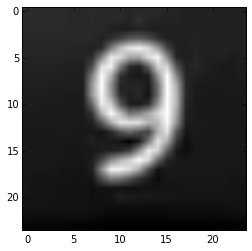

9
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]


In [129]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(digits_new['data'][:-5], digits_new['target'][:-5])
plt.imshow(digits_new['data'][-2].reshape(24,24))
plt.show()
print int(neigh.predict(digits_new['data'][-2]))
print neigh.predict_proba(digits_new['data'][-2])

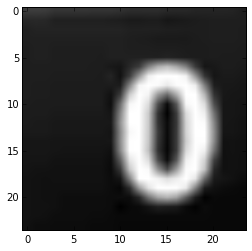

(24, 24)
(24, 24)
[1]
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [128]:
pil_im = Image.open('training_set/test.png', 'r').convert('L')
plt.imshow(np.asarray(pil_im))
plt.show()
# pil_im.thumbnail((8,8), Image.ANTIALIAS)
# plt.imshow(np.asarray(pil_im))
# plt.show()
print np.asarray(pil_im).shape
print np.asarray(pil_im).shape
print neigh.predict(np.asarray(pil_im).ravel())
print neigh.predict_proba(np.asarray(pil_im).ravel())